## **6.4: Supervised Machine Learning: Regression**

### **This script contains the following:**
##### 1. Importing libraries and data
##### 2. Data prep for regression analysis
##### 3. Regression analysis

### **1. Importing libraries and data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path
path = r'C:\Users\karya\Sourcing Open Data'

In [4]:
path

'C:\\Users\\karya\\Sourcing Open Data'

In [5]:
# Importing boat_data

df= pd.read_csv(os.path.join(path, '02. Data','Prepared Data', 'Boat_Sales_clean_Data_Task2.csv'))

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_Euro,Engine_type,Engine_condition,Boat_age,Country,City,Boat_Type,Price category,View Performance
0,0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226,94800.0,NaN,New,Old (built between 2000-2017),Switzerland,Lake Geneva,Motor Yacht,Middle price( 94800 -108000),Good (More than 170)
1,1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,94800.0,NaN,New,Modern (built after 2017),Germany,Bnningstedt,Center console boat,Middle price( 94800 -108000),Average (70-170)
2,2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64,94800.0,NaN,New,Modern (built after 2017),Denmark,Svendborg,Sport Boat,Middle price( 94800 -108000),Low (less than 70)
3,3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,94800.0,NaN,New,Modern (built after 2017),Germany,Bayern,Fishing Boat,Middle price( 94800 -108000),Low (less than 70)
4,4,6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,Switzerland Â» Neuenburgersee Â» Yvonand,474,94800.0,Unleaded,Used,Very Old (built before 2000),Switzerland,Neuenburgersee,Catamaran,Middle price( 94800 -108000),Good (More than 170)


#### The dataframe imported is a clean Dataframe from previous Tasks.

## 2. Data prep for regression analysis

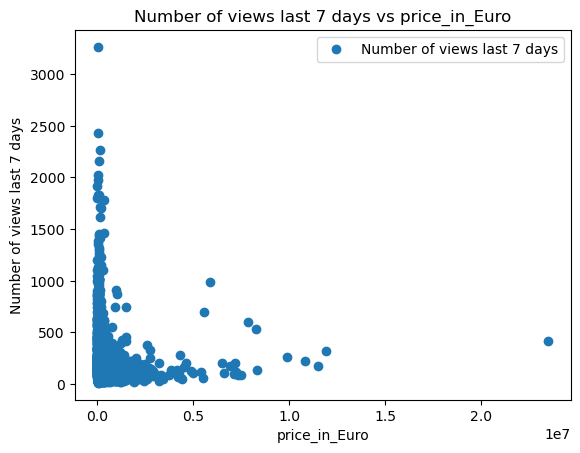

In [7]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'price_in_Euro', y='Number of views last 7 days',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of views last 7 days vs price_in_Euro')  
plt.xlabel('price_in_Euro')  
plt.ylabel('Number of views last 7 days')  
plt.show()

## **The Hypothesis:**
### The higher the price of the Boat the less views will it get.

##### Next, we need to prepare our independent and dependent variables for our regression analysis. 
##### The scikit-learn library is programmed to take in NumPy arrays, which are a specific format from the NumPy library.
##### To make these arrays, we need to reshape our variables using the reshape() function, then put them into separate objects, X and y:

In [8]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['price_in_Euro'].values.reshape(-1,1)
y = df['Number of views last 7 days'].values.reshape(-1,1)

In [9]:
X

array([[94800.],
       [94800.],
       [94800.],
       ...,
       [ 4499.],
       [94800.],
       [94800.]])

In [10]:
y

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]], dtype=int64)

#### We need to train our model on a “training set” of data, then test the model on a “test set” of data.
#### To that end, we first need to split each variable into a training and test set by using a built-in scikit-learn function, train_test_split():

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## **Regression analysis**

#### To run the regression, we’ll use the scikit-learn functions.
#### We start by creating a regression object:

regression = LinearRegression()

In [12]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

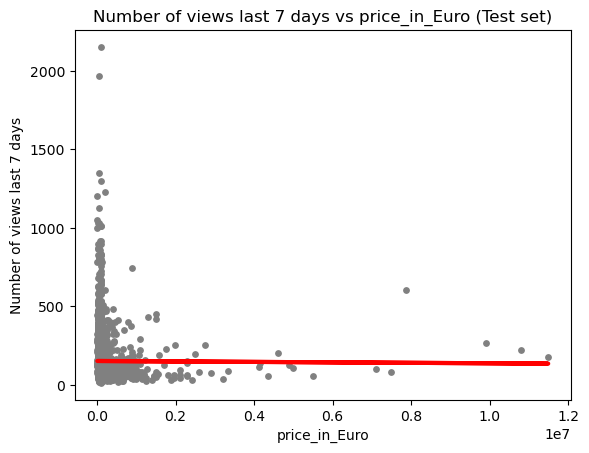

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of views last 7 days vs price_in_Euro (Test set)')
plot_test.xlabel('price_in_Euro')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

#### The red line is the regression line—but how accurate is its fit to the test set? And, subsequently, how accurate is it at predicting Number of views last 7 days(the y variable)?

##### We can see immediately that the linear model represented by the red regression line doesn’t perfectly cover all of our data points. In order to check the accuracy of the model, we need to check its performance in more ways than just visually. 
##### We can do this by checking some of the model’s summary statistics—namely, slope, root mean squared error, and r-squared value. After applying the regression model on our test data, we have the following summary statistics to interpret:

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [17]:
# Print the model summary statistics. This is where we evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.46697171e-06]]
Mean squared error:  21235.028789346623
R2 score:  -0.0006277700976276002


In [18]:
y_predicted

array([[151.65109148],
       [151.28185353],
       [151.13104883],
       ...,
       [151.71783752],
       [151.79881436],
       [151.79881436]])

The slope is a coefficient that tells you how the y variable changes when X changes. A negative slope value indicates a negative relationship (as X rises, y drops), and a positive slope indicates a positive relationship (as X rises, so does y). A coefficient of zero would mean that as X rises, y stays the same.

Here, we have a negative relationship, so the coefficient is negative, too. The slope here means that as X rises (as the price of the boat rises), y slightly drops (the Number of views last 7 days drops) at a degree of [[-1.46697171e-06]]. This is great! However, while it does tell us the regression  line has a generally negative slope, it doesn’t actually tell us how well our model performed. For that, we need the other two metrics—the root mean squared error (MSE) and the r-squared value. Let’s take a look at those now

The root mean squared error (MSE) is an estimator that measures the average of the squared difference between the estimated values and the true values. Put more simply, it tells us how close a regression line is to a set of points (i.e., its accuracy). It does so by taking the distances from the points to the regression line and squaring them. The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data. A small MSE, however, means that the regression line passes fairly close to the observations, making it a good fit.

In our case, the MSE is quite large at (21235.028789346623). From this, it’s safe to say that a regression may not be the best model to represent this data and can’t accurately predict the influence of price in Euro on the Number of views last 7 days.

Now, let’s take a look at the r-squared value (sometimes written as R2 score, especially in code), which is a metric that tells you how well the model explains the variance in the data.let’s discuss it in more detail below. It’s a number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. It can also take a negative value such as in our case (R2 score:  -0.0006277700976276002) if the model fits worse than a horizontal line.

After looking at both of these, it’s pretty clear that our model isn’t performing well. But there’s still one more way to do a last manual check—by making a dataframe of y values and their predicted values. Doing so will let us physically see the difference between the two and get a feel for how close or how off the model is from reality:

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,160,151.651091
1,402,151.281854
2,99,151.131049
3,81,151.571287
4,196,151.534466
5,153,151.798814
6,154,151.798814
7,603,140.381814
8,25,151.798814
9,199,151.798814


Right off the bat, we can see there’s quite the difference between the actual and predicted y values. This just adds evidence to the fact that our model isn’t doing a great job of explaining the relationship between the “ price _in_Euro” and “ Number of views last 7 dyas” variables.

Now that you’ve confirmed the inaccuracy of your model, you can also rule out your hypothesis, “the higher the price of the boat, the  the less views will it get.” As it turns out, this statement is only partially true.

For the time being, we know that while the pirce in Euro (the price of the Boat) is an important factor in attracting views, but it’s not the only one.

## **Compare how the regression fits the training set**

**OVERFITTING**

Another way to check how well our model fits is to run it on our training data set—in other words, the same data set it learned from. We can usually expect this to fit better than on the test set; however, do keep in mind that having a high R2 score (such as in our case R2 score:  2.3472365643817383e-05) on the train set and a much lower score on the test set likely means you’ve overfitted your model. Overfitting means making a model too specific—so that in the end it can ONLY fit itself to the training data and not any other data (making it a bit useless when it comes to predicting things).
Let’s check the fit of our current regression model on the training set:

In [20]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.46697171e-06]]
Mean squared error:  25449.046632357415
R2 score:  2.3472365643817383e-05


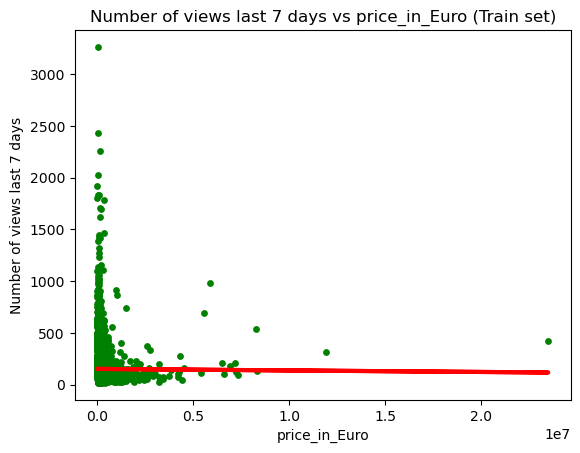

In [24]:
# Visualizing the training set results.

plot_test = plt
scatter= plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of views last 7 days vs price_in_Euro (Train set)')
plot_test.xlabel('price_in_Euro')
plot_test.ylabel('Number of views last 7 days')
plot_test.show()

In [26]:
# Exporting the visualization
scatter.figure.savefig(os.path.join(path, '04. Analysis','Visualizations', 'Views_price_scatterplot.png'))

The result? We have overfit the Model (confirmed by an R2 score of  2.3472365643817383e-05). However, it also confirms that the relationship we are exploring isn’t purely linear.